In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from deap import tools
import os
import json
from importlib import reload
import OPT_xinhai
reload(OPT_xinhai)
from OPT_xinhai import run_mu_plus_lambda, run_mu_comma_lambda


pygame 2.5.1 (SDL 2.28.2, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


c:\Users\lxand\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\lxand\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# DO NOT RUN THE CELL BELOW !!!

In [ ]:

num_runs = 10
diversity_levels = [0, 0.2, 0.5, 0.7, 1]
enemies = [1, 3, 5]


results_plus = {diversity: {enemy: {'avg_fitness': [], 'std_fitness': [], 'max_fitness': []} for enemy in enemies} for diversity in diversity_levels}
results_comma = {diversity: {enemy: {'avg_fitness': [], 'std_fitness': [], 'max_fitness': []} for enemy in enemies} for diversity in diversity_levels}

for diversity in diversity_levels:
    for enemy in enemies:
        for _ in range(num_runs):
            print(f'Running diversity: {diversity}, enemy: {enemy}, run: {_}, mu + lambda')
            stats_mu_plus = run_mu_plus_lambda(enemy, diversity, generations=70, population_size=100, mutation_rate=0.2, Crossover_prob=0.5)
            print(f'Running diversity: {diversity}, enemy: {enemy}, run: {_}, mu, lambda')
            stats_mu_comma = run_mu_comma_lambda(enemy, diversity, generations=70, population_size=100, mutation_rate=0.2, Crossover_prob=0.5)
            
            avg_fitness_plus = [gen['Fitness avg'] for gen in stats_mu_plus]
            avg_fitness_comma = [gen['Fitness avg'] for gen in stats_mu_comma]
            
            std_fitness_plus = [gen['Fitness std'] for gen in stats_mu_plus]
            std_fitness_comma = [gen['Fitness std'] for gen in stats_mu_comma]

            max_fitness_plus = [gen['Fitness max'] for gen in stats_mu_plus]
            max_fitness_comma = [gen['Fitness max'] for gen in stats_mu_comma]
            
            results_plus[diversity][enemy]['avg_fitness'].append(avg_fitness_plus)
            results_plus[diversity][enemy]['std_fitness'].append(std_fitness_plus)
            results_plus[diversity][enemy]['max_fitness'].append(max_fitness_plus)

            results_comma[diversity][enemy]['avg_fitness'].append(avg_fitness_comma)
            results_comma[diversity][enemy]['std_fitness'].append(std_fitness_comma)
            results_comma[diversity][enemy]['max_fitness'].append(max_fitness_comma)





# Define the folder name
folder_name = "EvoData_results_xinhai"

# Get the current working directory
current_directory = os.getcwd()

# Create the new folder path
folder_path = os.path.join(current_directory, folder_name)

# Create new folder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file paths for JSON
file_path_plus_json = os.path.join(folder_path, "results_plus.json")
file_path_comma_json = os.path.join(folder_path, "results_comma.json")

# Save results using JSON
with open(file_path_plus_json, 'w') as f:
    json.dump(results_plus, f)

with open(file_path_comma_json, 'w') as f:
    json.dump(results_comma, f)




## ------------------------------------- Strat From Here -------------------------------------

In [11]:
folder_name = "EvoData_results_xinhai"
current_directory = os.getcwd()
folder_path = os.path.join(current_directory, folder_name)
file_path_plus_json = os.path.join(folder_path, "results_plus.json")
file_path_comma_json = os.path.join(folder_path, "results_comma.json")

# Read the data
with open(file_path_plus_json, 'r') as f:
    results_plus = json.load(f)
    
with open(file_path_comma_json, 'r') as f:
    results_comma = json.load(f)

### With Various Diversity, Comparing Avg_fitness vs. Generation

C:\Users\lxand\AppData\Local\Temp\ipykernel_3736\1982600686.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_plus = plt.cm.get_cmap('viridis')
C:\Users\lxand\AppData\Local\Temp\ipykernel_3736\1982600686.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_comma = plt.cm.get_cmap('plasma')


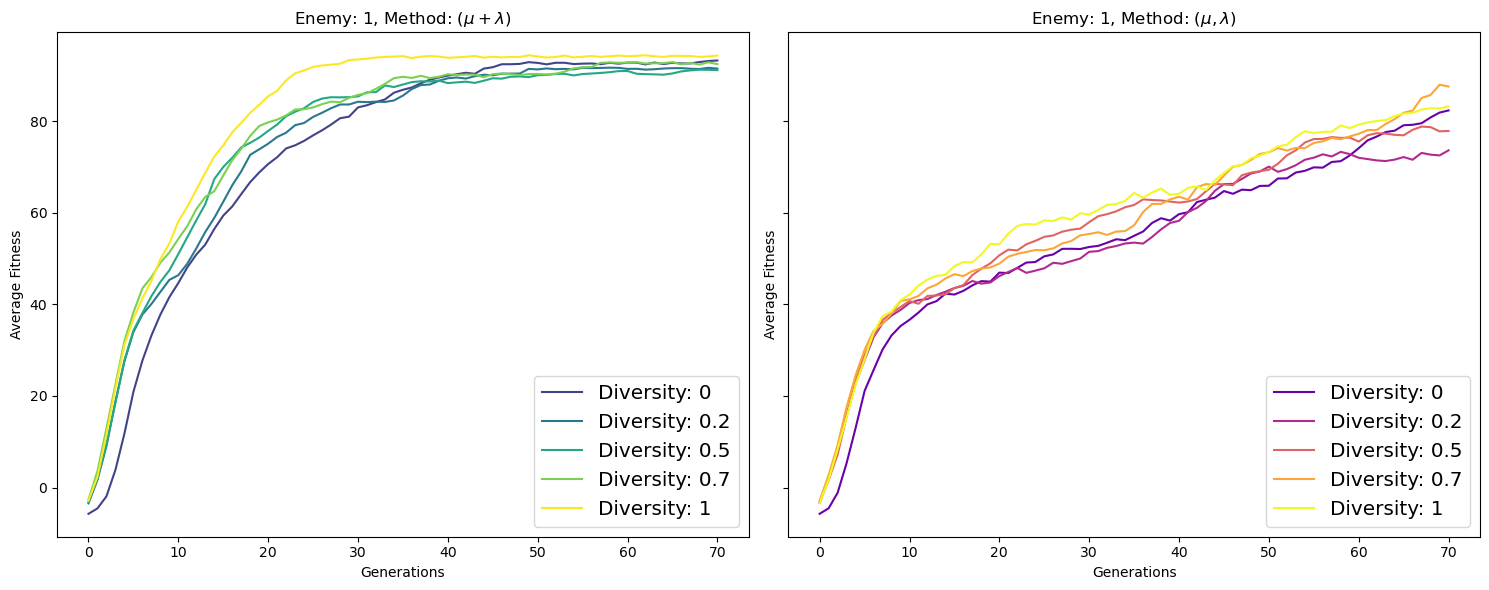

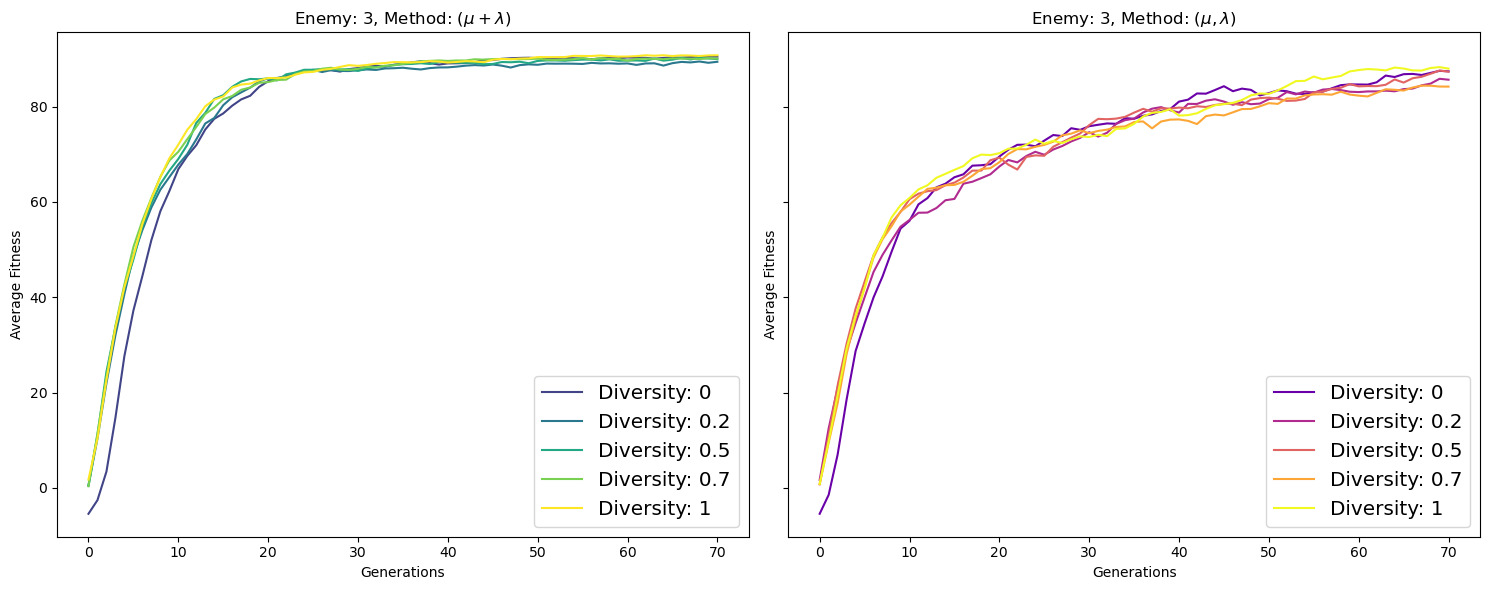

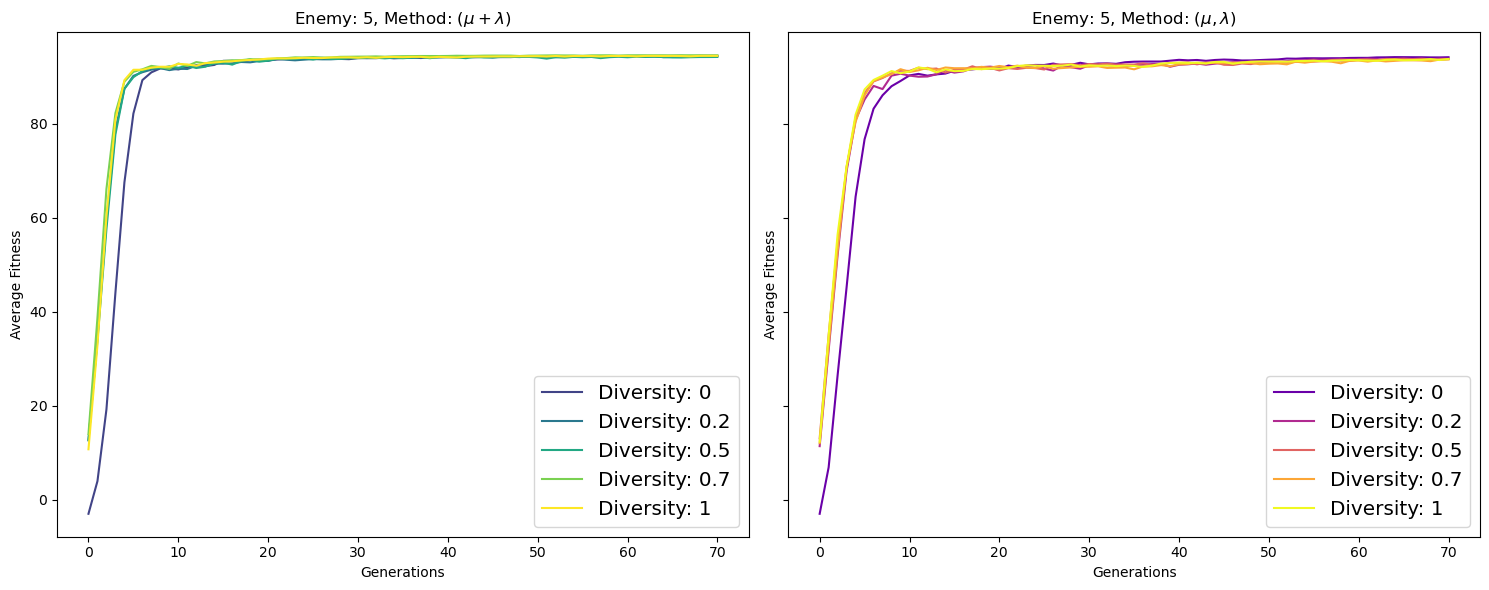

In [21]:
# Initialize color maps for each EA method
cmap_plus = plt.cm.get_cmap('viridis')
cmap_comma = plt.cm.get_cmap('plasma')


num_runs = 10
diversity_levels = [0, 0.2, 0.5, 0.7, 1]
enemies = [1, 3, 5]

for enemy in enemies:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    for i, diversity in enumerate(diversity_levels):
        # Generate a color from the color map
        color_plus = cmap_plus((i + 1) / len(diversity_levels))
        color_comma = cmap_comma((i + 1) / len(diversity_levels))


        # Calculate the means across all runs for mu + lambda and mu, lambda
        mean_mu_plus = np.mean(np.array(results_plus[str(diversity)][str(enemy)]['avg_fitness']), axis=0)
        mean_mu_comma = np.mean(np.array(results_comma[str(diversity)][str(enemy)]['avg_fitness']), axis=0)

        # Plotting for mu + lambda
        axes[0].plot(mean_mu_plus, label=f'Diversity: {diversity}', color=color_plus)
        
        # Plotting for mu, lambda
        axes[1].plot(mean_mu_comma, label=f'Diversity: {diversity}', color=color_comma)
        
    axes[0].set_title(f'Enemy: {enemy}, Method: $(\mu + \lambda)$')
    axes[1].set_title(f'Enemy: {enemy}, Method: $(\mu, \lambda)$')
    
    for ax in axes:
        ax.set_xlabel('Generations')
        ax.set_ylabel('Average Fitness')
        ax.legend(loc='lower right', fontsize='x-large')  
    
    plt.tight_layout()
    plt.show()

### With Various Diversity, Comparing Max_fitness vs. Generation

In [20]:
# Initialize color maps for each EA method
cmap_plus = plt.cm.get_cmap('viridis')
cmap_comma = plt.cm.get_cmap('plasma')


num_runs = 10
diversity_levels = [0, 0.2, 0.5, 0.7, 1]
enemies = [1, 3, 5]

for enemy in enemies:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    for i, diversity in enumerate(diversity_levels):
        # Generate a color from the color map
        color_plus = cmap_plus((i + 1) / len(diversity_levels))
        color_comma = cmap_comma((i + 1) / len(diversity_levels))


        # Calculate the means across all runs for mu + lambda and mu, lambda
        mean_mu_plus = np.mean(np.array(results_plus[str(diversity)][str(enemy)]['max_fitness']), axis=0)
        mean_mu_comma = np.mean(np.array(results_comma[str(diversity)][str(enemy)]['max_fitness']), axis=0)

        # Plotting for mu + lambda
        axes[0].plot(mean_mu_plus, label=f'Diversity: {diversity}', color=color_plus)
        
        # Plotting for mu, lambda
        axes[1].plot(mean_mu_comma, label=f'Diversity: {diversity}', color=color_comma)
        
    axes[0].set_title(f'Enemy: {enemy}, Method: $(\mu + \lambda)$')
    axes[1].set_title(f'Enemy: {enemy}, Method: $(\mu, \lambda)$')
    
    for ax in axes:
        ax.set_xlabel('Generations')
        ax.set_ylabel('Maximum Fitness')
        ax.legend(loc='lower right', fontsize='x-large')  
    
    plt.tight_layout()
    plt.show()

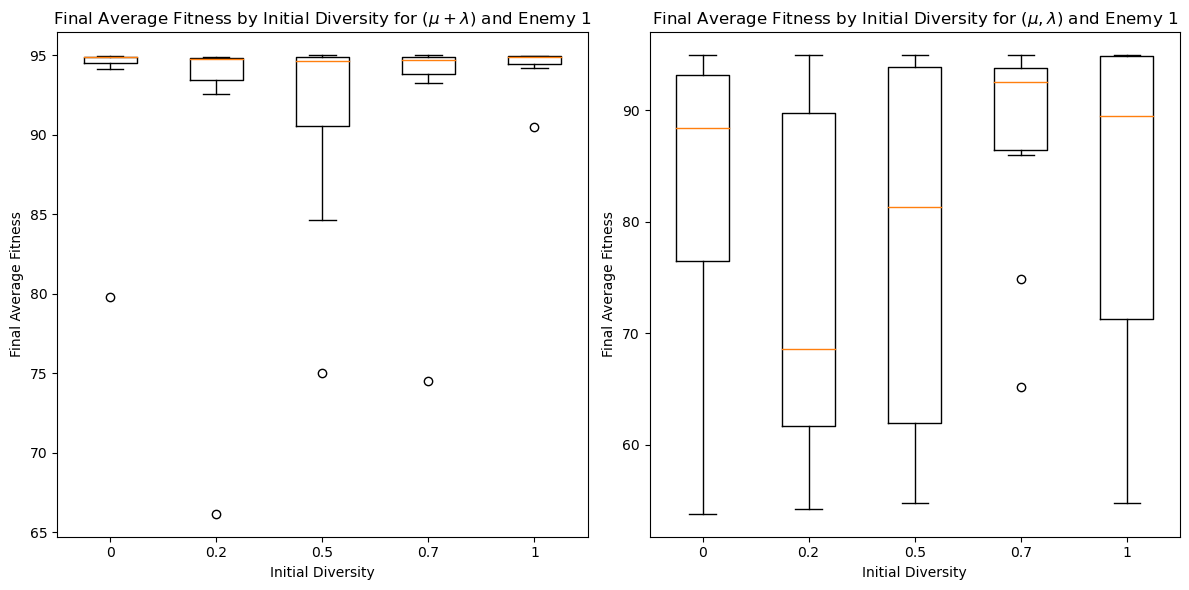

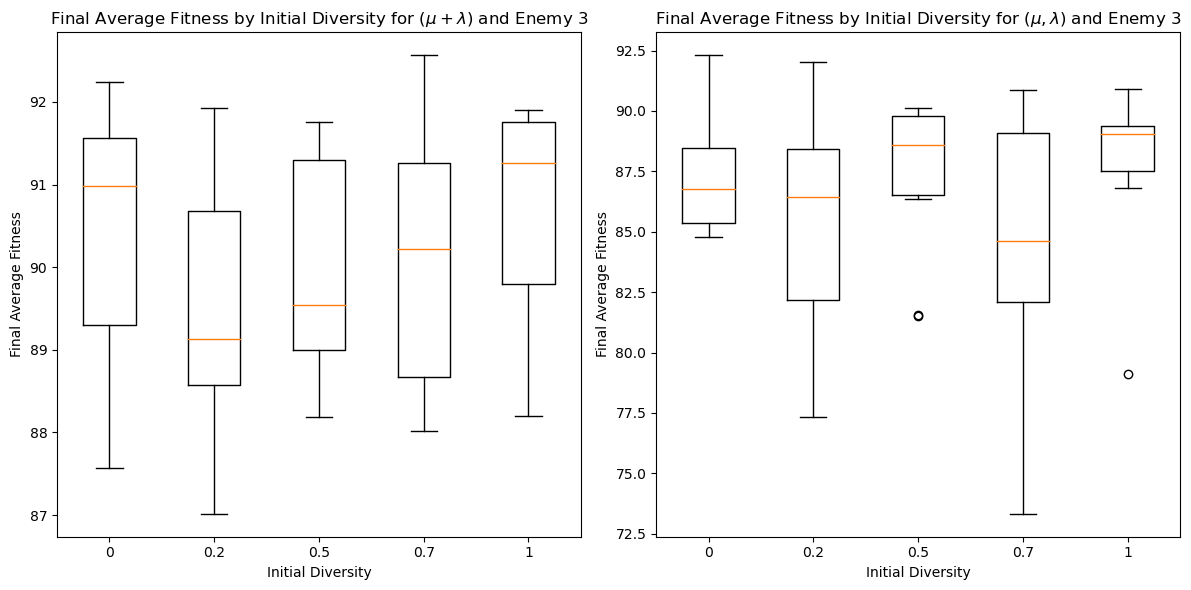

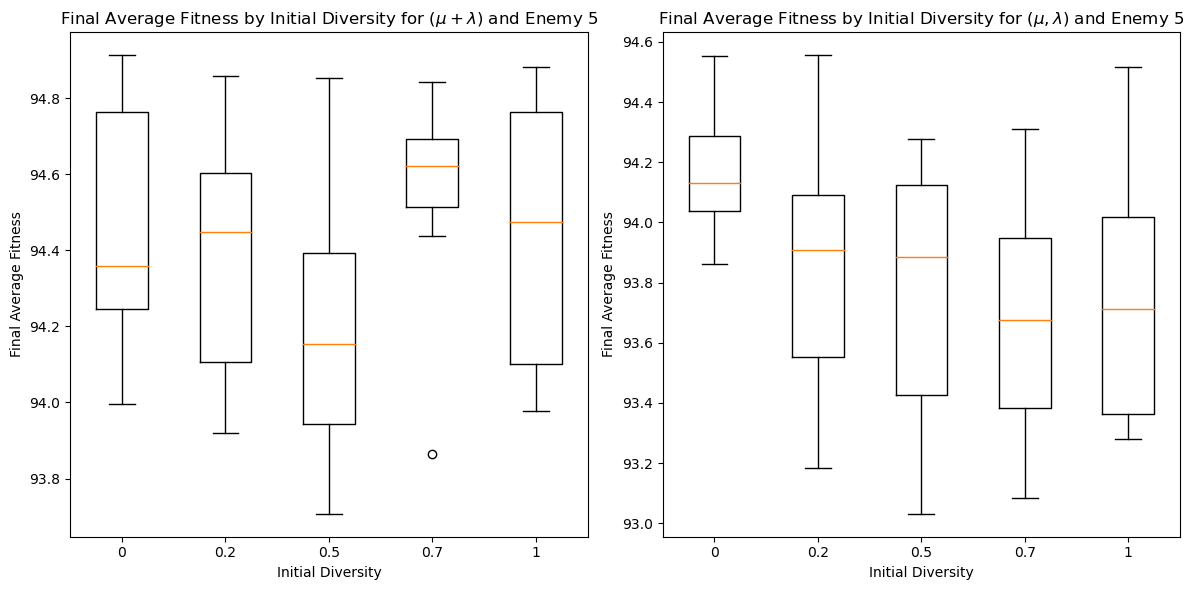

In [73]:
for enemy in enemies:
    # Lists to store final average fitness values for each diversity level
    final_avg_fitness_plus = []
    final_avg_fitness_comma = []
    
    # Collect final average fitness for each diversity level
    for div in diversity_levels:
        final_avg_fitness_plus.append([run[-1] for run in results_plus[str(div)][str(enemy)]['avg_fitness']])
        final_avg_fitness_comma.append([run[-1] for run in results_comma[str(div)][str(enemy)]['avg_fitness']])
    
    # Create subplots for each method
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Boxplot for mu + lambda
    axes[0].boxplot(final_avg_fitness_plus, labels=[str(d) for d in diversity_levels])
    axes[0].set_title(f'Final Average Fitness by Initial Diversity for $(\mu + \lambda)$ and Enemy {enemy}')
    axes[0].set_xlabel('Initial Diversity')
    axes[0].set_ylabel('Final Average Fitness')
    
    # Boxplot for mu, lambda
    axes[1].boxplot(final_avg_fitness_comma, labels=[str(d) for d in diversity_levels])
    axes[1].set_title(f'Final Average Fitness by Initial Diversity for $(\mu, \lambda)$ and Enemy {enemy}')
    axes[1].set_xlabel('Initial Diversity')
    axes[1].set_ylabel('Final Average Fitness')
    
    plt.tight_layout()
    plt.show()



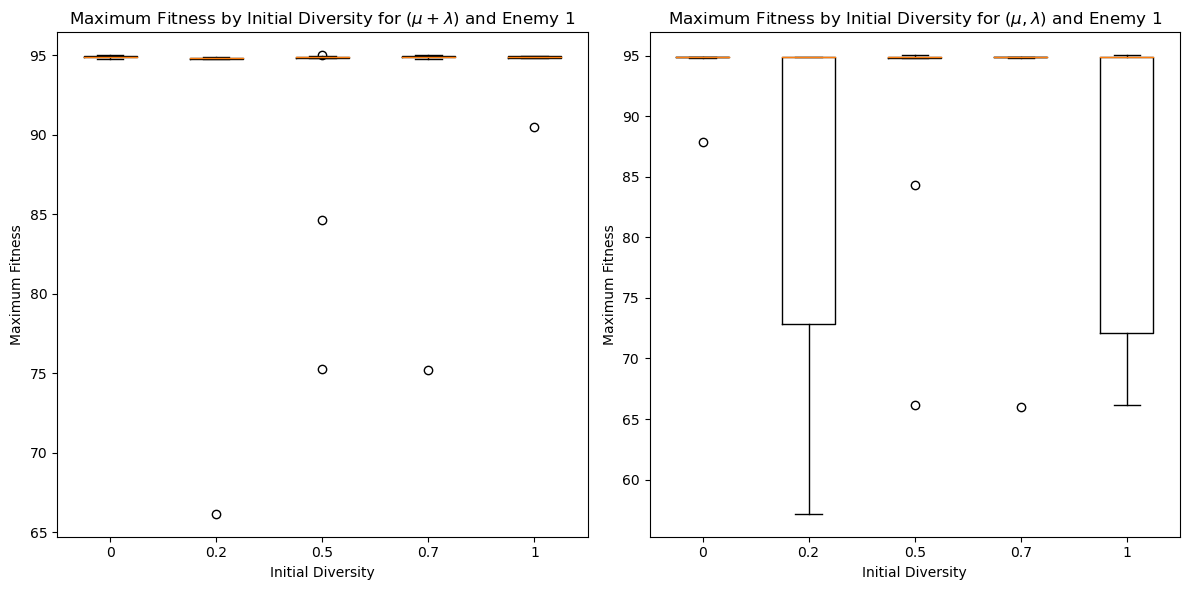

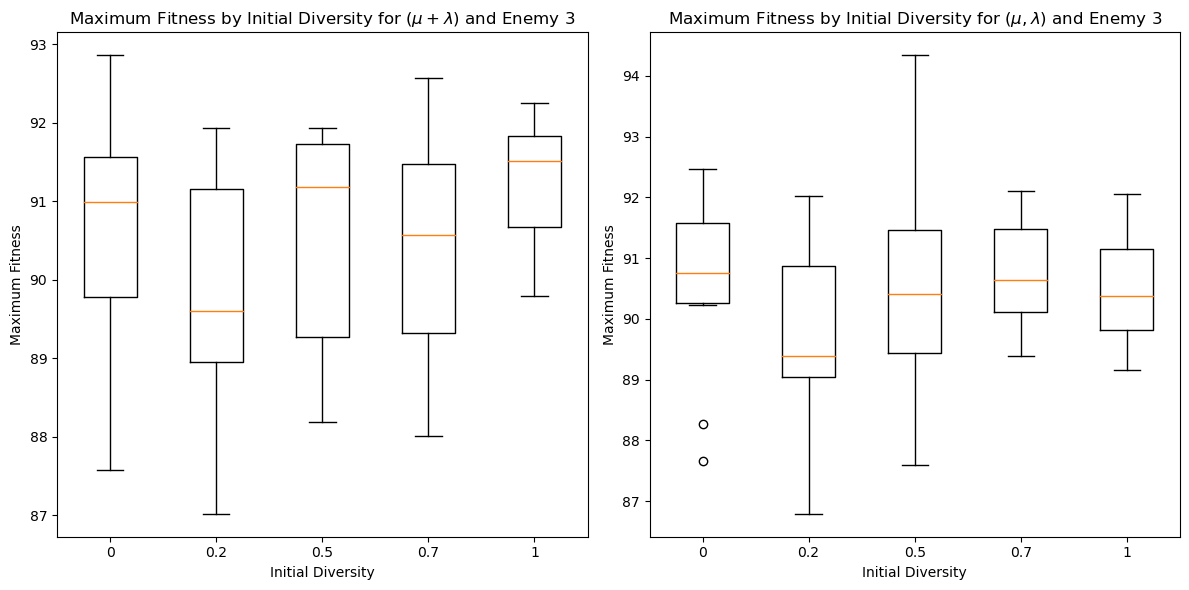

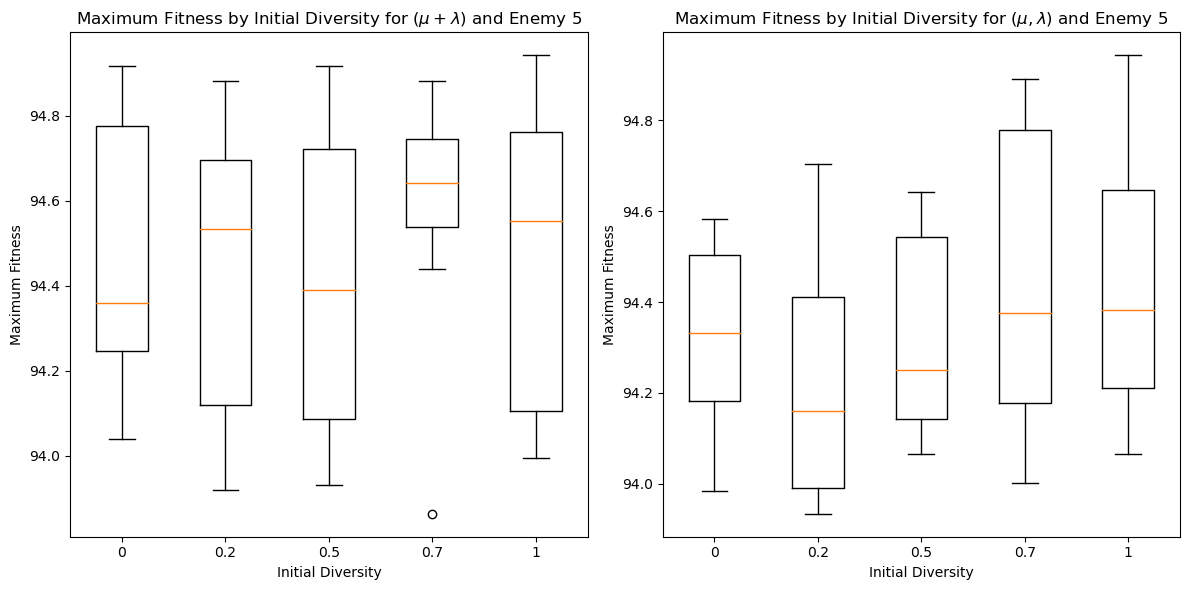

In [23]:
for enemy in enemies:
    # Lists to store final average fitness values for each diversity level
    final_avg_fitness_plus = []
    final_avg_fitness_comma = []
    
    # Collect final average fitness for each diversity level
    for div in diversity_levels:
        final_avg_fitness_plus.append([run[-1] for run in results_plus[str(div)][str(enemy)]['max_fitness']])
        final_avg_fitness_comma.append([run[-1] for run in results_comma[str(div)][str(enemy)]['max_fitness']])
    
    # Create subplots for each method
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Boxplot for mu + lambda
    axes[0].boxplot(final_avg_fitness_plus, labels=[str(d) for d in diversity_levels])
    axes[0].set_title(f'Maximum Fitness by Initial Diversity for $(\mu + \lambda)$ and Enemy {enemy}')
    axes[0].set_xlabel('Initial Diversity')
    axes[0].set_ylabel('Maximum Fitness')
    
    # Boxplot for mu, lambda
    axes[1].boxplot(final_avg_fitness_comma, labels=[str(d) for d in diversity_levels])
    axes[1].set_title(f'Maximum Fitness by Initial Diversity for $(\mu, \lambda)$ and Enemy {enemy}')
    axes[1].set_xlabel('Initial Diversity')
    axes[1].set_ylabel('Maximum Fitness')
    
    plt.tight_layout()
    plt.show()

In [75]:
import scipy.stats as stats

for enemy in enemies:
    # Collect final average fitness for each diversity level and method
    final_avg_fitness_plus = [np.mean([run[-1] for run in results_plus[str(div)][str(enemy)]['avg_fitness']]) for div in diversity_levels]
    final_avg_fitness_comma = [np.mean([run[-1] for run in results_comma[str(div)][str(enemy)]['avg_fitness']]) for div in diversity_levels]
    
    # Spearman correlation tests
    spearman_corr_plus, p_value_plus = stats.spearmanr(diversity_levels, final_avg_fitness_plus)
    spearman_corr_comma, p_value_comma = stats.spearmanr(diversity_levels, final_avg_fitness_comma)
    
    print(f"For enemy {enemy}:")
    print(f"  - Spearman correlation between initial diversity and final average fitness for $(\mu + \lambda)$ is {spearman_corr_plus}.")
    print(f"    - A p-value of {p_value_plus} suggests that this correlation is {'significant' if p_value_plus < 0.05 else 'not significant'}.")
    print(f"  - Spearman correlation between initial diversity and final average fitness for $(\mu, \lambda)$ is {spearman_corr_comma}.")
    print(f"    - A p-value of {p_value_comma} suggests that this correlation is {'significant' if p_value_comma < 0.05 else 'not significant'}.")


For enemy 1:
  - Spearman correlation between initial diversity and final average fitness for $(\mu + \lambda)$ is 0.3.
    - A p-value of 0.6238376647810728 suggests that this correlation is not significant.
  - Spearman correlation between initial diversity and final average fitness for $(\mu, \lambda)$ is 0.6.
    - A p-value of 0.28475697986529375 suggests that this correlation is not significant.
For enemy 3:
  - Spearman correlation between initial diversity and final average fitness for $(\mu + \lambda)$ is 0.39999999999999997.
    - A p-value of 0.5046315754686911 suggests that this correlation is not significant.
  - Spearman correlation between initial diversity and final average fitness for $(\mu, \lambda)$ is 0.09999999999999999.
    - A p-value of 0.8728885715695383 suggests that this correlation is not significant.
For enemy 5:
  - Spearman correlation between initial diversity and final average fitness for $(\mu + \lambda)$ is 0.09999999999999999.
    - A p-value of 0.87